# Assignment3 Part 1

Download the data, write the code in Python or R (Python is preferable) and run the code to mine frequent patterns from the training dataset. You can use any pattern mining algorithm discussed in the course, e.g. Apriori or FP-Growth. You can also use a method that is not discussed in the course, but a method description is required and why it is selected.
Input: data, output: patterns.

## 1. Read the data

In [1]:
#import libraries
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

### Train dataset

In [2]:
#read file
df_train = pd.read_csv("./Groceries data train.csv") 
#display the first 10 columns
df_train.head(10)

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,3021,30/01/2015,frankfurter,2015,1,30,4
1,1292,24/10/2015,pork,2015,10,24,5
2,4206,4/04/2014,root vegetables,2014,4,4,4
3,4369,25/08/2015,onions,2015,8,25,1
4,1522,1/07/2014,waffles,2014,7,1,1
5,2053,17/09/2015,cereals,2015,9,17,3
6,2914,10/09/2014,yogurt,2014,9,10,2
7,4089,10/04/2015,sausage,2015,4,10,4
8,2460,27/10/2015,rolls/buns,2015,10,27,1
9,2738,2/03/2015,root vegetables,2015,3,2,0


In [3]:
#check data information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    27000 non-null  int64 
 1   Date             27000 non-null  object
 2   itemDescription  27000 non-null  object
 3   year             27000 non-null  int64 
 4   month            27000 non-null  int64 
 5   day              27000 non-null  int64 
 6   day_of_week      27000 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.4+ MB


In [4]:
#check if null value
df_train.isnull().sum()

Member_number      0
Date               0
itemDescription    0
year               0
month              0
day                0
day_of_week        0
dtype: int64

In [5]:
print('unique users in the dataset', df_train['Member_number'].nunique())
print('unique items in the dataset', df_train['itemDescription'].nunique())

unique users in the dataset 3872
unique items in the dataset 167


### Test dataset

In [6]:
#read
df_test = pd.read_csv("./Groceries data test.csv") 
df_test.head(10)

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,3481,8/03/2015,candy,2015,3,8,6
1,1254,19/04/2015,white wine,2015,4,19,6
2,2835,28/01/2014,domestic eggs,2014,1,28,1
3,2854,2/08/2015,coffee,2015,8,2,6
4,4637,12/08/2014,bottled water,2014,8,12,1
5,1547,3/09/2014,long life bakery product,2014,9,3,2
6,2613,4/11/2015,soda,2015,11,4,2
7,2051,9/11/2015,frankfurter,2015,11,9,0
8,2736,3/02/2015,pip fruit,2015,2,3,1
9,4747,6/08/2015,tropical fruit,2015,8,6,3


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11765 entries, 0 to 11764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    11765 non-null  int64 
 1   Date             11765 non-null  object
 2   itemDescription  11765 non-null  object
 3   year             11765 non-null  int64 
 4   month            11765 non-null  int64 
 5   day              11765 non-null  int64 
 6   day_of_week      11765 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 643.5+ KB


In [8]:
df_test.isnull().sum().sort_values(ascending=False)

Member_number      0
Date               0
itemDescription    0
year               0
month              0
day                0
day_of_week        0
dtype: int64

In [9]:
print('unique users in the dataset', df_test['Member_number'].nunique())
print('unique items in the dataset', df_test['itemDescription'].nunique())

unique users in the dataset 3566
unique items in the dataset 162


### Analysis:
- The datasets has no null value
- Seems like each transaction splitted by item, therfore each row represent an item selled. In order to obtain the complete transaction to obtain the basket set, we need to use groupby member_number and date.
- Column "day_of_week", 0 is Monday, 1 is Tuesday and so on.

## 2. Data visualisation

Use sns.barplot() plot a barplot, so I can understand more about the dataset and get to know the top selling item of the dataset.

Use ax.set_xticklabels to set the x axis label with list of string labels, it would make the barplot looks better.

In the following visualisation, whole milk, various vegetables, rolls/buns, soda, and yoghurt are some of the most commonly purchased items. These products have consistently high annual sales volumes, indicating a steady demand for them

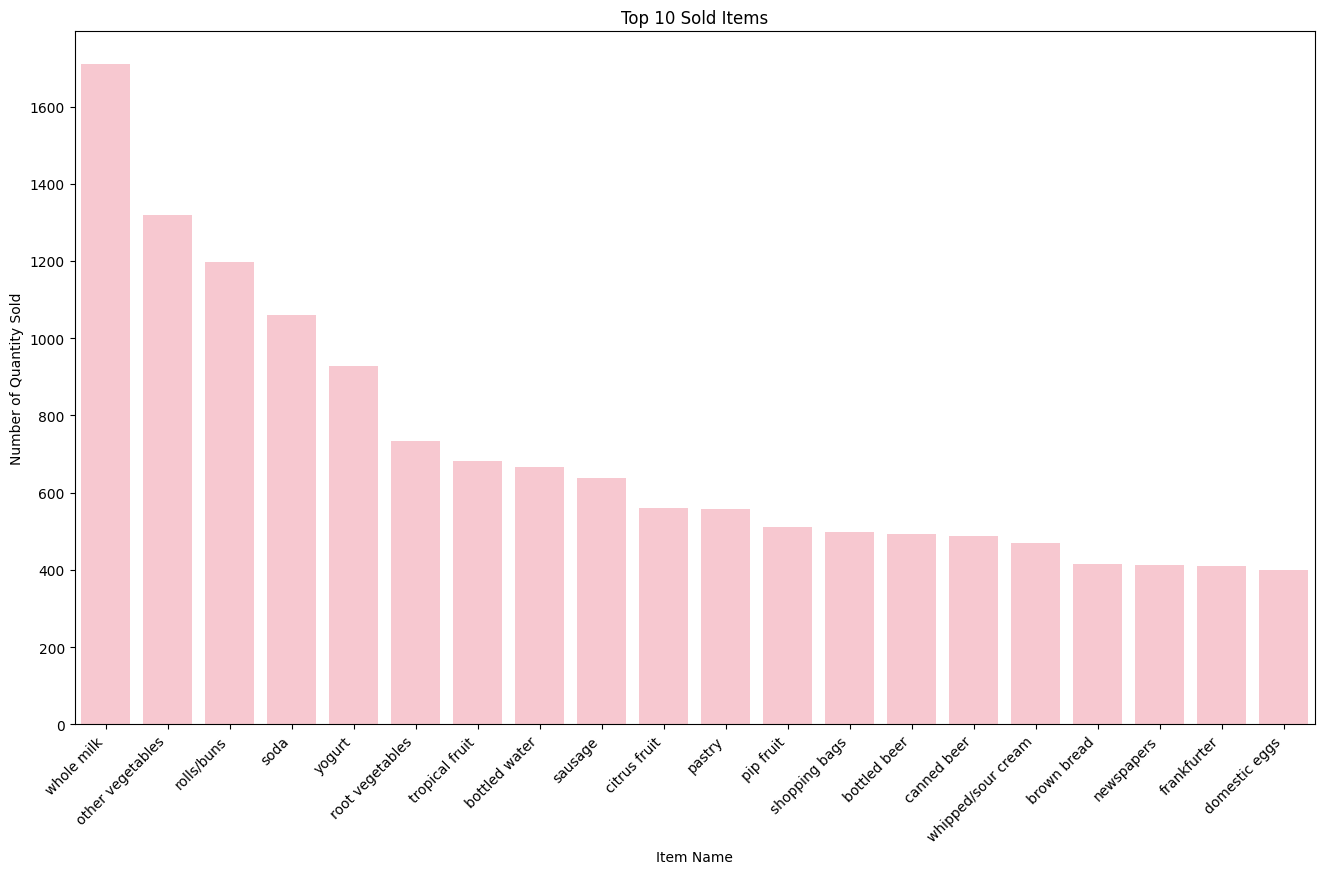

In [10]:
#get top 20 best seller
top_items = df_train['itemDescription'].value_counts().head(20)
#plotting
plt.figure(figsize=(16, 9))
ax = sns.barplot(x=top_items.index, y=top_items.values, color='pink')
ax.set(xlabel='Item Name', ylabel='Number of Quantity Sold', title='Top 10 Sold Items')

#rotate to look better
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

Sales of seasonal goods, such as tropical fruits and root vegetables, are higher in the fall and winter, indicating that people are more likely to purchase these items when they are in season and the weather is cooler. Additionally, sales of other products see sporadic upswings, including seasonal and specialized goods, such as prosecco and specialty chocolate. These increases may reflect demand during holidays or special events.

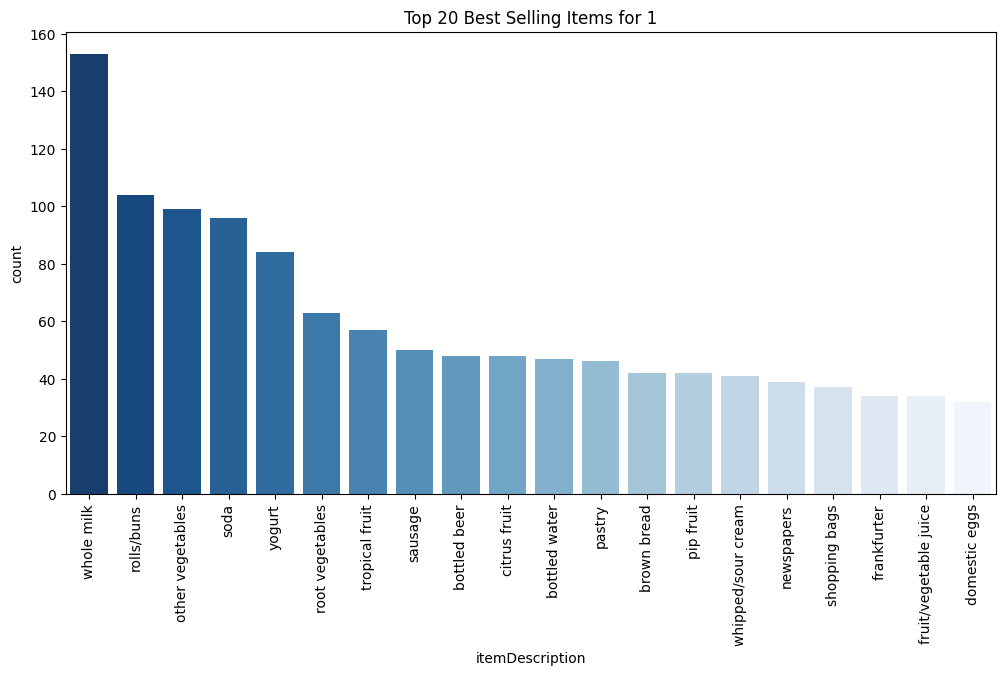

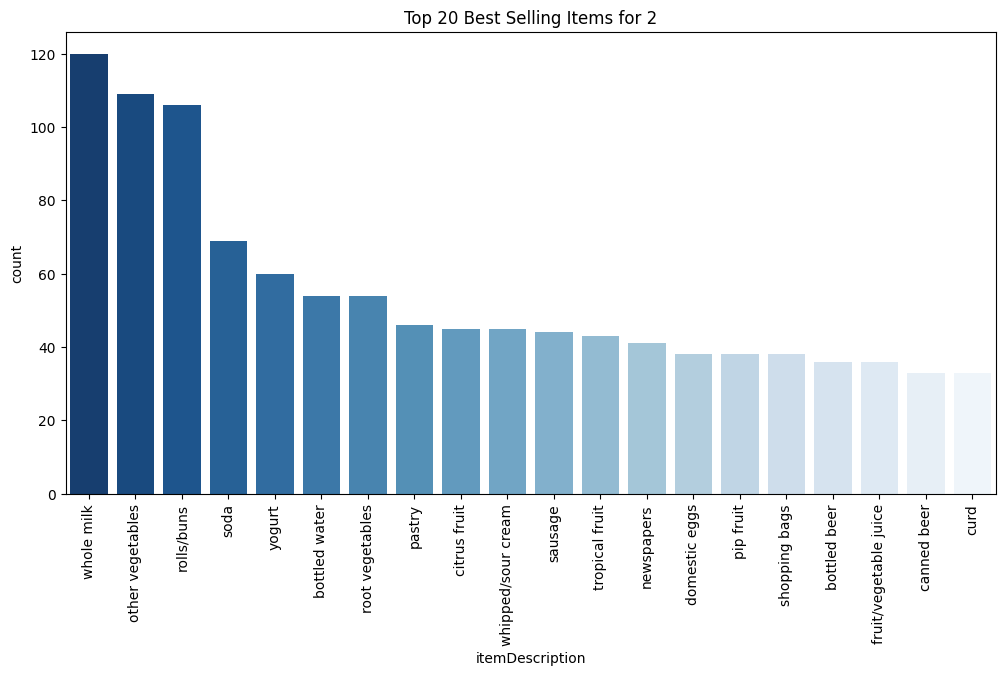

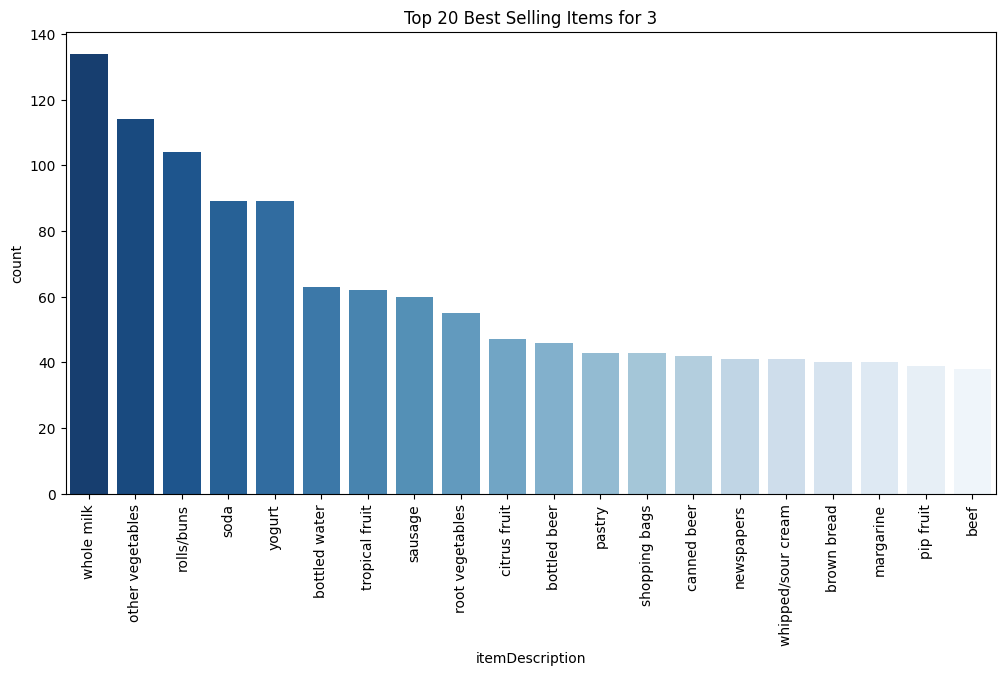

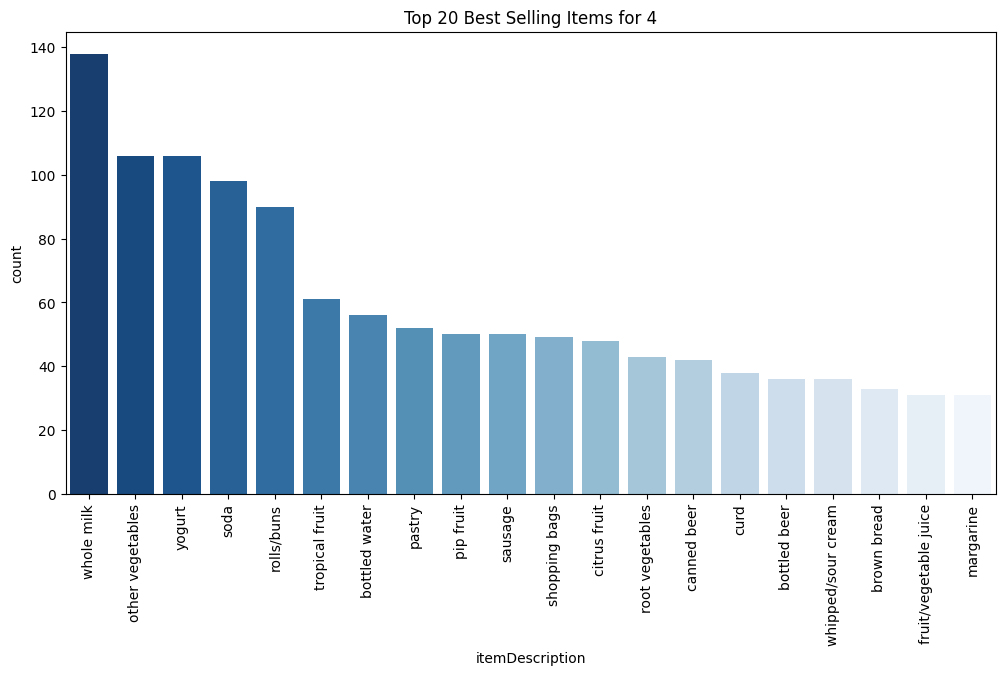

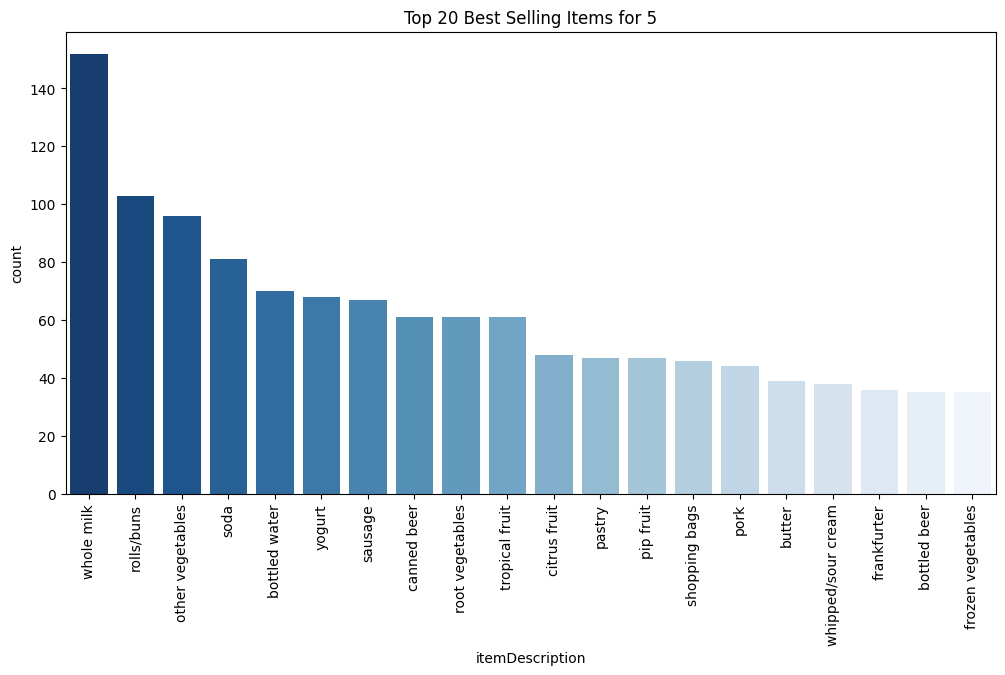

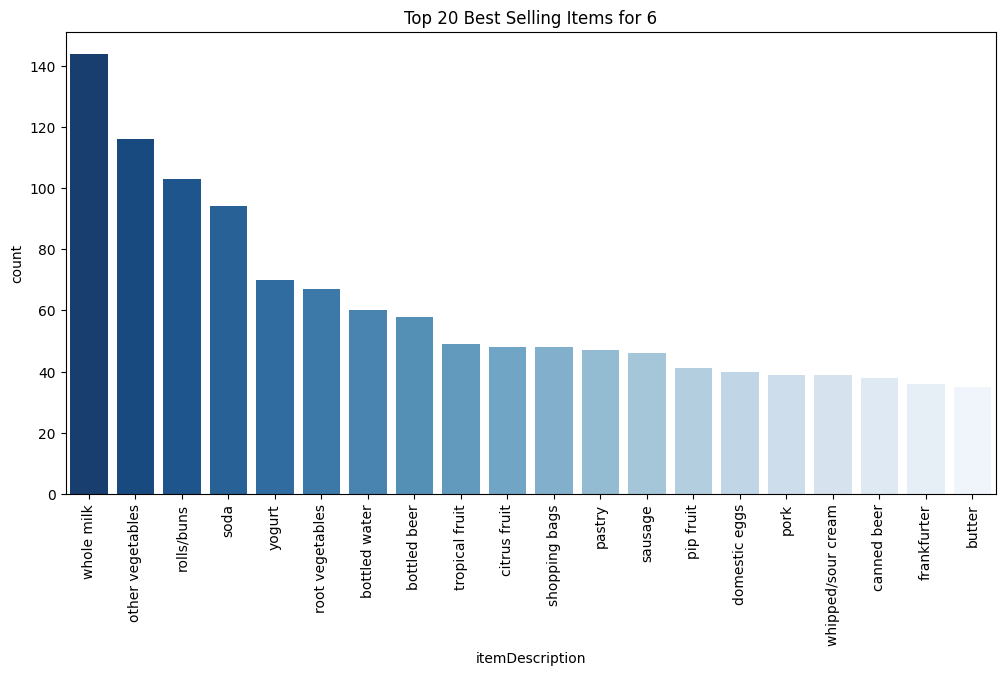

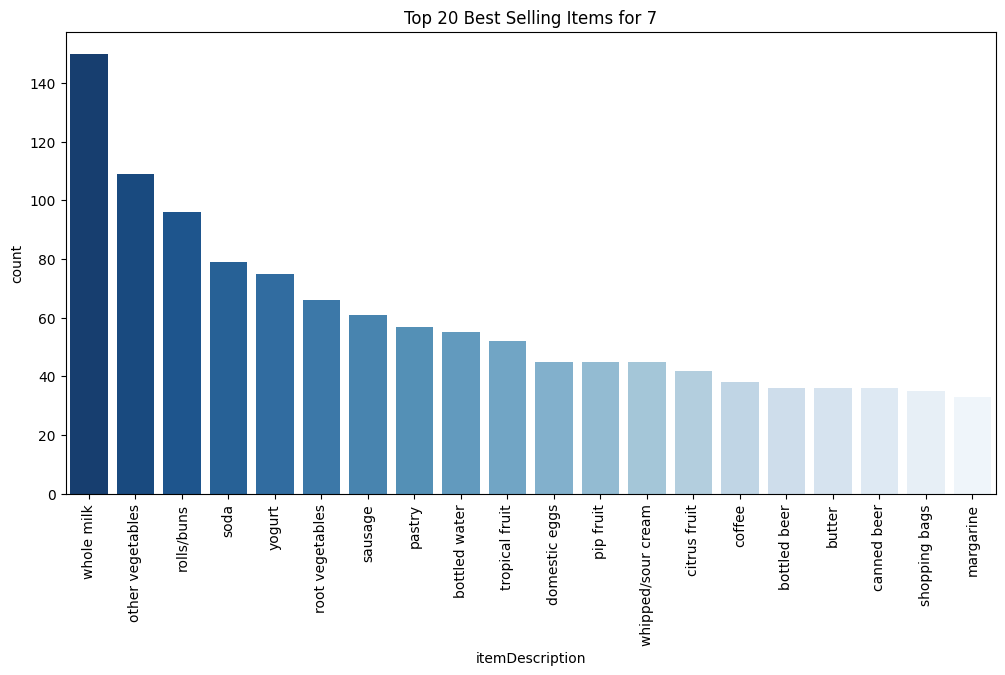

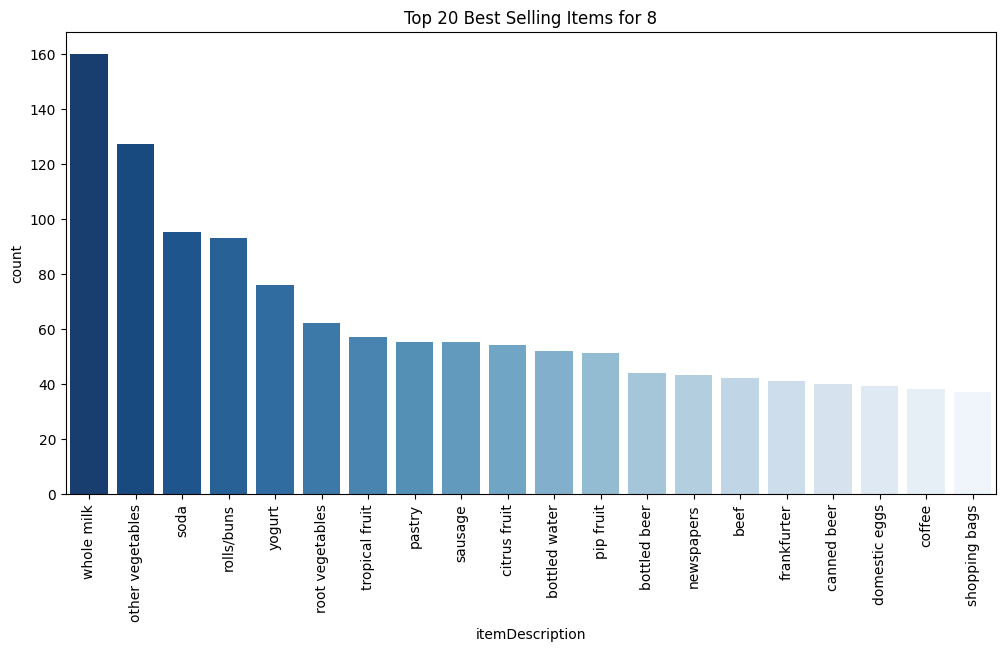

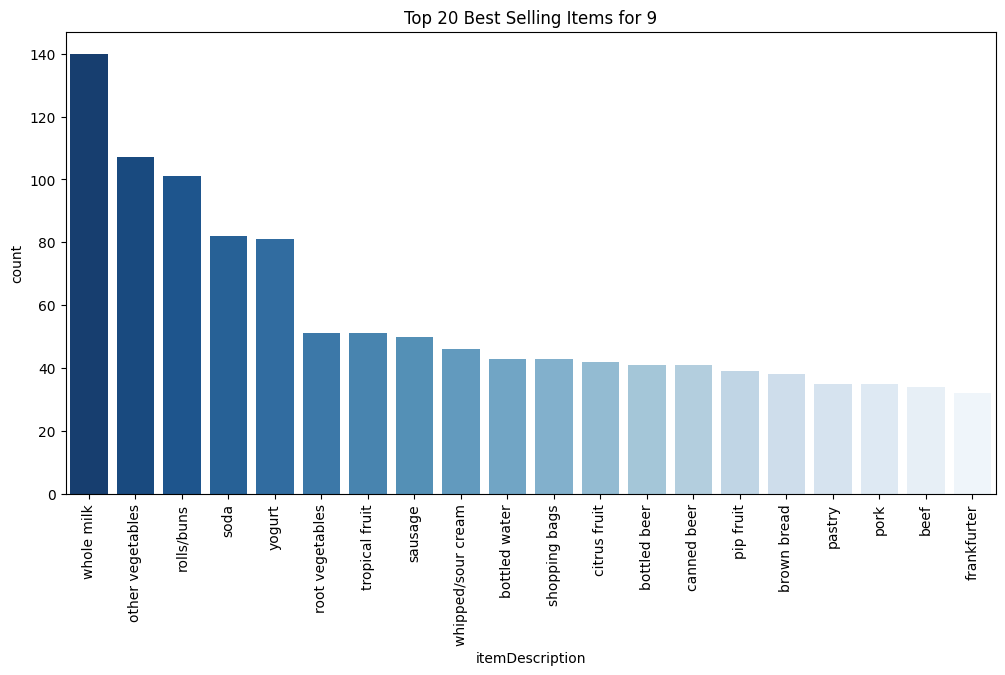

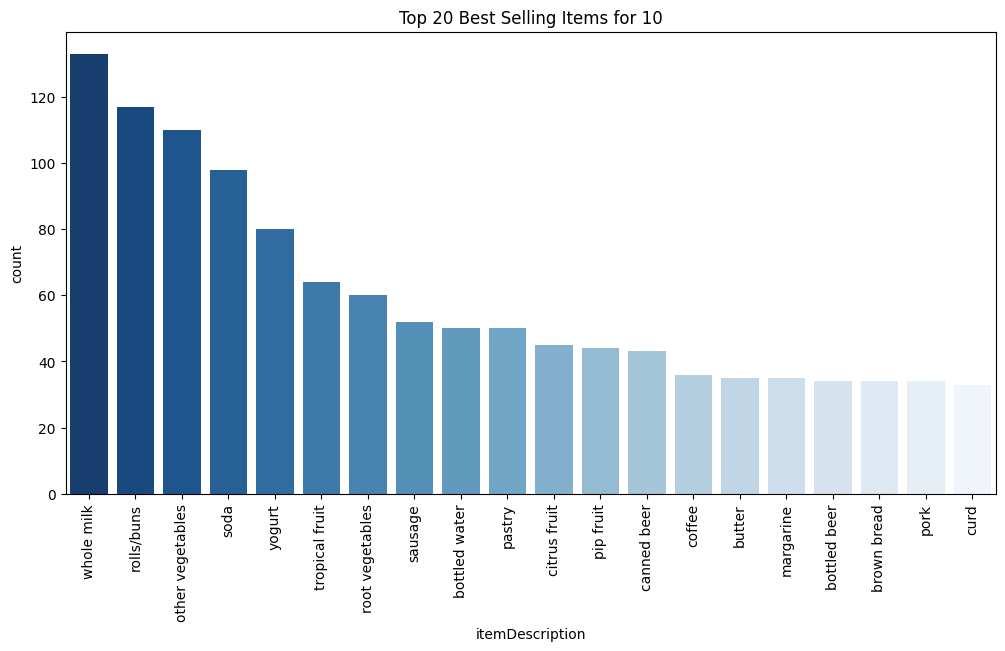

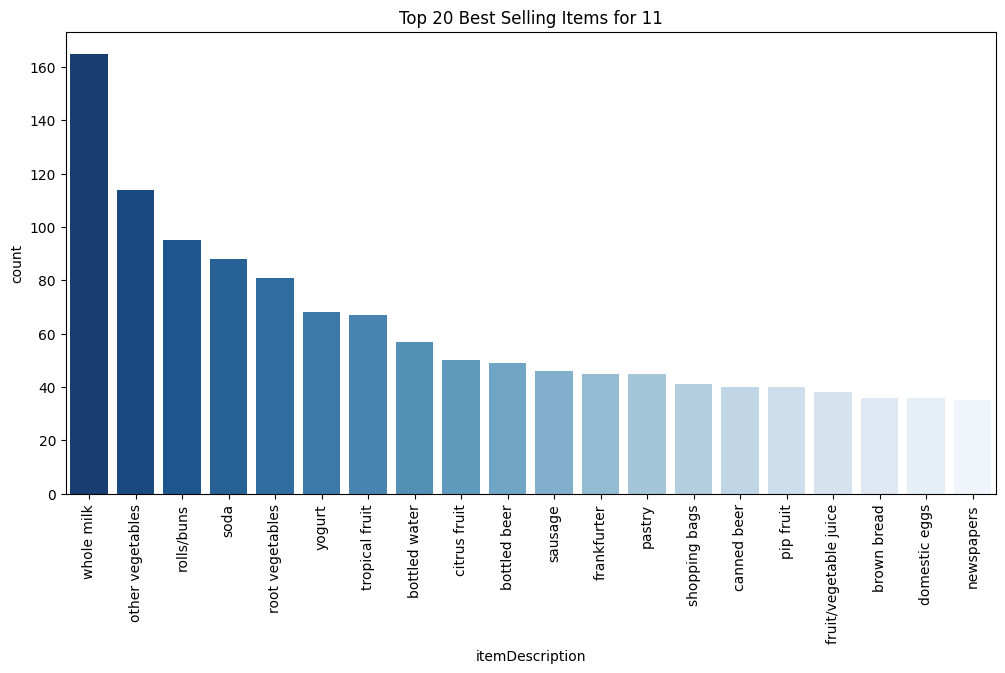

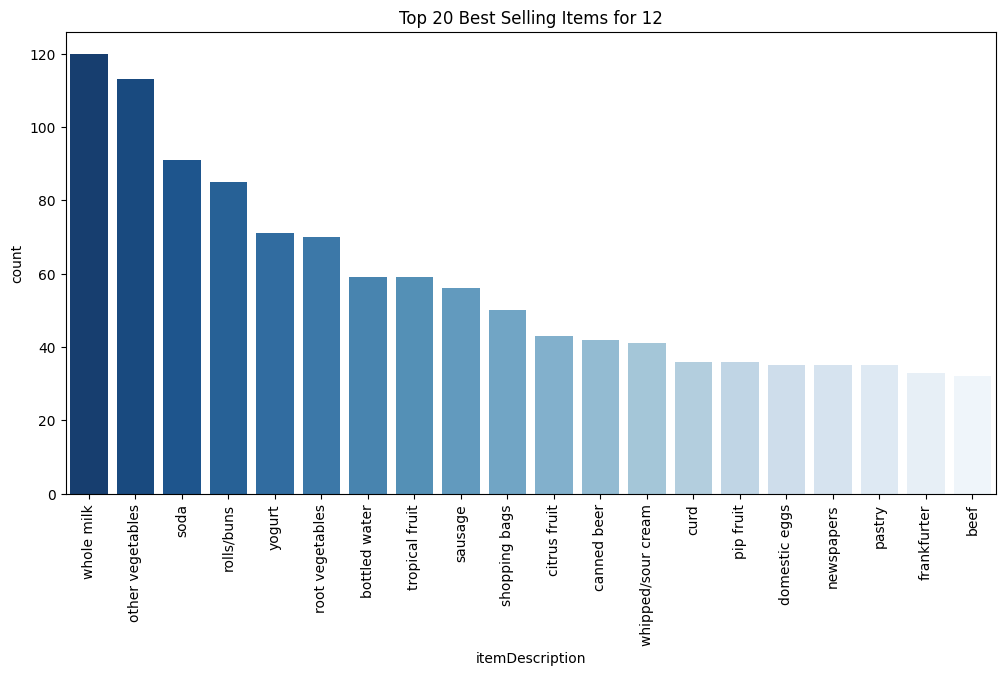

In [11]:
#check top selling items per month
monthly_sales = df_train.groupby(['month', 'itemDescription']).size().reset_index(name='count')

#Get top 20 best sell
top_items = monthly_sales.groupby('month').apply(lambda x: x.nlargest(20, columns=['count'])).reset_index(drop=True)

for month in top_items['month'].unique():
    plt.figure(figsize=(12,6))
    plt.title(f'Top 20 Best Selling Items for {month}')
    plt.xlabel('Item Description')
    plt.ylabel('Number of Sales')
    sns.barplot(data=top_items[top_items['month']==month], x='itemDescription', y='count', palette='Blues_r')
    plt.xticks(rotation=90)
    plt.show()

The pivot_table function is used to transform and reshape data in Pandas. So I can convert the top selling items data into a matrix form where the rows represent the day of the week and the columns represent the item description.

In this visualisation, we can see that tropical fruit always sell on Thursday. Anothers items selling data are normal.

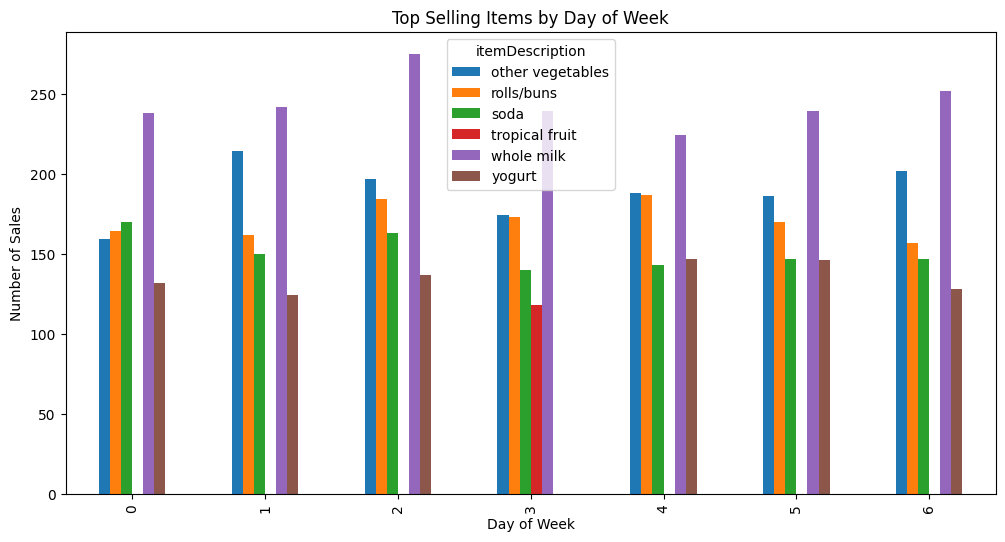

In [12]:
#check top selling items per day of week
top_items = df_train.groupby(["day_of_week"])["itemDescription"].value_counts().groupby(level=0, group_keys=False).nlargest(5)
top_items = top_items.reset_index(name="count")

#create a pivot table
pivot_table = pd.pivot_table(top_items, values="count", index=["day_of_week"], columns=["itemDescription"], fill_value=0)

pivot_table.plot(kind="bar", figsize=(12, 6))
plt.title("Top Selling Items by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Sales")

plt.show()


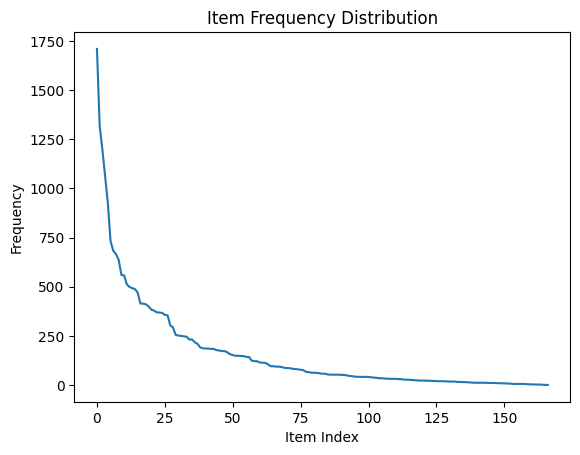

In [13]:
import matplotlib.pyplot as plt

# plot the frequency distribution of item occurrences
item_counts = df_train['itemDescription'].value_counts()
plt.plot(item_counts.values)
plt.title('Item Frequency Distribution')
plt.xlabel('Item Index')
plt.ylabel('Frequency')
plt.show()

Long tail problem detected!

The dataset contains records of purchases made by 3,872 unique users and 167 unique items that have been bought. While each user has made at least one purchase, many items have not been purchased yet. Some items have been purchased frequently by many users, while others have been purchased only a few times. As the data visualization output shows, there is a long tail distribution that can make it challenging to make accurate recommendations for niche items with limited purchase data. 

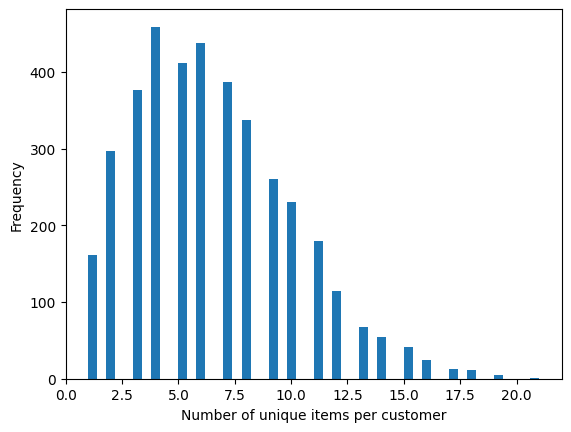

In [14]:
# group the transaction history by Member_number and count the number of unique items for each customer
unique_items_per_customer = df_train.groupby('Member_number')['itemDescription'].nunique()

# plot a histogram of the number of unique items per customer
plt.hist(unique_items_per_customer, bins=50)
plt.xlabel('Number of unique items per customer')
plt.ylabel('Frequency')
plt.show()

Cold start problem detected!

There are only 167 unique items in the dataset, it is likely that some items have very few purchases, while others are very popular. This represents a cold start problem with the dataset, where there may not be enough data about the preferences of new users to make accurate recommendations.

In [15]:
unique_items_per_customer.to_csv("unique_item_per_customer.csv", index=False, quoting=0)

## 3. Pre-processing

### Train dataset

In [16]:
#sort by Member in ascending order
sorted_train = df_train.sort_values(by=['Member_number'])
#converts the Member_number column from string to numeric data type
#so that it can be grouped properly in the next step
sorted_train['Member_number'] = pd.to_numeric(sorted_train['Member_number'])

In [17]:
#groupby member_number, date and items
sorted_train['shopping_trip'] = sorted_train['Member_number'].astype(str) + '_' + sorted_train['Date']
itemList_train = sorted_train.groupby(['shopping_trip'])['itemDescription'].apply(lambda x: ','.join(x)).reset_index()
itemList_train

,shopping_trip,itemDescription
0,1000_15/03/2015,"yogurt,sausage"
1,1000_24/06/2014,pastry
2,1000_24/07/2015,"canned beer,misc. beverages"
3,1000_25/11/2015,sausage
4,1000_27/05/2015,"pickled vegetables,soda"
...,...,...
13896,4999_26/12/2015,"herbs,bottled water"
13897,4999_4/09/2014,"semi-finished bread,newspapers"
13898,5000_16/11/2014,other vegetables
13899,5000_2/10/2015,soda


In [18]:
#generate a csv list of the basket set in case team members need my output data
itemList_train.to_csv("ItemList_train.csv", index=False, quoting=0)

In [19]:
#read the basket set and store as basket
basket_train = pd.read_csv('ItemList_train.csv', header=None, sep=',').applymap(str).values.tolist()
basket_train

[['shopping_trip', 'itemDescription'],
 ['1000_15/03/2015', 'yogurt,sausage'],
 ['1000_24/06/2014', 'pastry'],
 ['1000_24/07/2015', 'canned beer,misc. beverages'],
 ['1000_25/11/2015', 'sausage'],
 ['1000_27/05/2015', 'pickled vegetables,soda'],
 ['1001_12/12/2014', 'whole milk,soda'],
 ['1001_14/04/2015', 'beef,white bread'],
 ['1001_2/07/2014', 'rolls/buns,whole milk,sausage'],
 ['1001_20/01/2015', 'whipped/sour cream,soda'],
 ['1001_5/02/2015', 'frankfurter,curd'],
 ['1002_2/09/2014', 'frozen vegetables'],
 ['1002_26/04/2014', 'butter,whole milk'],
 ['1002_26/04/2015', 'tropical fruit,sugar'],
 ['1002_30/08/2015', 'butter milk'],
 ['1003_15/10/2014', 'root vegetables,detergent'],
 ['1003_19/01/2014', 'dental care'],
 ['1003_2/10/2015', 'sausage'],
 ['1003_27/02/2014', 'rolls/buns'],
 ['1004_12/02/2015', 'other vegetables,hygiene articles'],
 ['1004_13/10/2014', 'whole milk'],
 ['1004_19/08/2014', 'pastry,whole milk'],
 ['1004_2/04/2014', 'whole milk,pip fruit'],
 ['1004_5/01/2014', 

### Test dataset

In [20]:
sorted_test = df_test.sort_values(by=['Member_number'])
sorted_test['Member_number'] = pd.to_numeric(sorted_test['Member_number'])

In [21]:
#use groupby to generate complete transaction
sorted_test['shopping_trip'] = sorted_test['Member_number'].astype(str) + '_' + sorted_test['Date']
itemList_test = sorted_test.groupby(['shopping_trip'])['itemDescription'].apply(lambda x: ','.join(x)).reset_index()
itemList_test

,shopping_trip,itemDescription
0,1000_15/03/2015,"whole milk,semi-finished bread"
1,1000_24/06/2014,"salty snack,whole milk"
2,1000_25/11/2015,hygiene articles
3,1001_20/01/2015,frankfurter
4,1002_2/09/2014,other vegetables
...,...,...
8768,4999_16/05/2015,whipped/sour cream
8769,4999_19/05/2014,detergent
8770,4999_24/01/2015,"yogurt,berries"
8771,5000_16/11/2014,bottled beer


In [22]:
itemList_test.to_csv("ItemList_test.csv", index=False, quoting=0)
#read the basket set and store as basket
basket_test = pd.read_csv('ItemList_test.csv', header=None, sep=',').applymap(str).values.tolist()
basket_test

[['shopping_trip', 'itemDescription'],
 ['1000_15/03/2015', 'whole milk,semi-finished bread'],
 ['1000_24/06/2014', 'salty snack,whole milk'],
 ['1000_25/11/2015', 'hygiene articles'],
 ['1001_20/01/2015', 'frankfurter'],
 ['1002_2/09/2014', 'other vegetables'],
 ['1002_30/08/2015', 'specialty chocolate'],
 ['1003_19/01/2014', 'frozen meals'],
 ['1003_2/10/2015', 'rolls/buns'],
 ['1003_27/02/2014', 'rolls/buns'],
 ['1004_13/10/2014', 'packaged fruit/vegetables,chocolate,rolls/buns'],
 ['1004_19/08/2014', 'root vegetables'],
 ['1004_2/04/2014', 'tropical fruit'],
 ['1004_7/10/2014', 'other vegetables'],
 ['1006_14/06/2015', 'whole milk'],
 ['1006_4/09/2014', 'whole milk'],
 ['1006_7/05/2014', 'bottled water,rolls/buns'],
 ['1006_7/11/2014', 'skin care'],
 ['1008_10/03/2015', 'liquor (appetizer)'],
 ['1008_21/07/2015', 'yogurt,root vegetables,soda'],
 ['1009_10/05/2015', 'newspapers,yogurt'],
 ['1009_23/09/2015', 'ketchup'],
 ['1010_27/08/2014', 'frankfurter'],
 ['1010_31/07/2015', 'cand

## 4. Pattern mining using Apriori algorithm

### Get association rules from Train dataset and Test dataset, test the train patterns on test patterns and get the precisions

In [23]:
# import libraries
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [24]:

# define train set
df_train = pd.DataFrame({'itemList': [','.join(transaction) for transaction in basket_train]})
transactions_train = df_train['itemList'].str.split(',')
te_train = TransactionEncoder()
te_ary_train = te_train.fit(transactions_train).transform(transactions_train)
df_train = pd.DataFrame(te_ary_train, columns=te_train.columns_)

# define test set
df_test = pd.DataFrame({'itemList': [','.join(transaction) for transaction in basket_test]})
transactions_test = df_test['itemList'].str.split(',')
te_test = TransactionEncoder()
te_ary_test = te_test.fit(transactions_test).transform(transactions_test)
df_test = pd.DataFrame(te_ary_test, columns=te_test.columns_)

# generate frequent itemsets from train set
frequent_itemsets_train = apriori(df_train, min_support=0.001, use_colnames=True)

# generate association rules from train set
rules_train = association_rules(frequent_itemsets_train, metric="confidence", min_threshold=0.05)

# generate frequent itemsets from test set
frequent_itemsets_test = apriori(df_test, min_support=0.001, use_colnames=True)

# generate association rules from test set
rules_test = association_rules(frequent_itemsets_test, metric="confidence", min_threshold=0.05)

# test association rules on test set
precision = []
for _, row in rules_test.iterrows():
    if any(frequent_itemsets_train['itemsets'] == row['antecedents']):
        precision.append(frequent_itemsets_test[frequent_itemsets_test['itemsets'] == row['consequents']].iloc[0]['support'])
    else:
        precision.append(0)
rules_precision = rules_test.copy()
rules_precision['precision'] = precision
# print association rules with precision
print(rules_precision)

           antecedents         consequents  antecedent support  \
0               (beef)        (whole milk)            0.016526   
1      (bottled water)  (other vegetables)            0.030317   
2        (frankfurter)        (rolls/buns)            0.019261   
3  (frozen vegetables)   (root vegetables)            0.013563   
4   (other vegetables)        (whole milk)            0.065307   
5             (pastry)        (whole milk)            0.025758   
6     (tropical fruit)        (whole milk)            0.039549   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.089013  0.001140    0.068966  0.774780 -0.000331    0.978468   
1            0.065307  0.001596    0.052632  0.805915 -0.000384    0.986621   
2            0.058924  0.001026    0.053254  0.903780 -0.000109    0.994011   
3            0.038409  0.001026    0.075630  1.969080  0.000505    1.040267   
4            0.089013  0.003305    0.050611  0.568578 -0.002508    0.959551 

In [25]:
#export csv in case team member needs it 
rules_train.to_csv("rules_train.csv", index=False, quoting=0)

The table of association rules displays pairs of things that are frequently purchased together. The products being purchased are the antecedents, and the items that are frequently purchased as a result are the consequents. Support, confidence, lift, leverage, conviction, and Zhang's metre are among the metrics provided in the table to assess the strength of the association. For example, row 0 shows that customers who buy UHT milk are more likely to buy other veggies, with a confidence of 0.8134 and a lift of 0.8766.

In [26]:
#export csv in case team member needs it 
rules_train.to_csv("rules_train.csv", index=False, quoting=0)

In [27]:
#export csv in case team member needs it 
rules_test.to_csv("rules_test.csv", index=False, quoting=0)

In [28]:
rules_precision.to_csv('association_rules_patterns_tested_on_test_set.csv', index=False)

## 5. Predict items based on Association rules from Train

In [29]:
#set header
col_headers_train = basket_train.pop(0)
#convert it to pddatafram
basket_train = pd.DataFrame(basket_train, columns=col_headers_train)

In [30]:
#convert basket to dataframe
col_headers = basket_test.pop(0)
basket_test = pd.DataFrame(basket_test, columns=col_headers)

####  Step 1. Extract the test set and train set of the same shopping_trip ID

In [31]:
#This is a function to extract the information extract both 
def extract_sets(basket_test, basket_train, index):
    #extract the test set
    test_trip = basket_test.iloc[index, 0]
    test_set_str = basket_test.iloc[index, 1]

    if not basket_train[basket_train['shopping_trip'] == test_trip].empty:
        train_set_str = basket_train[basket_train['shopping_trip'] == test_trip]['itemDescription'].iloc[0]
    
        #formatting
        test_set = test_set_str.split(',')
        train_set = train_set_str.split(',')
    else:
        test_set = test_set_str.split(',')
        train_set = []
    return test_set, train_set

####  Step 2. Generate a list of predicted items based on a set of purchased items using association rule mining

In [32]:
#from workshop 9
def predict_items(purchased_items):
    predicted_items = []
    
    #iterate over the rules
    for index, row in rules_train.iterrows():
        #get items from these columns
        antecedent = row["antecedents"]
        consequent = row["consequents"]
        #check if antecedent is pruchased item
        if antecedent.issubset(purchased_items):
            #if yes, add to prediction list
            predicted_items.append(consequent)
        
    #formatting
    predicted_items = [', '.join(list(x)) for x in predicted_items]
    return predicted_items

####  Step 3. Use Precision, Recall and F1 scores metrics to evaluate the result

In [33]:
# this is a function to first firnd its intersection to determine its precision and recall, 
#then calcalate the f1 score using precision and recall obtained.
def calculate_f1_score(predicted_items, train_set):
    #convert to list 
    predicted_items_list = list(predicted_items)
    
    #calculate presicion
    if len(predicted_items_list) == 0:
        precision = 0
    else:
        precision = len(set(predicted_items_list).intersection(train_set)) / len(predicted_items_list)

    #calculate recall
    if len(train_set) == 0:
        recall = 0
    else:
        recall = len(set(predicted_items_list).intersection(train_set)) / len(train_set)

    # calculate f1
    if precision + recall == 0:
        f1 = 0
    else:
        f1 = 2 * (precision * recall) / (precision + recall)
    return precision, recall, f1

####  Step 4. Obtain the average Precision, Recall and F1 scores of the entire set

In [34]:
def validate_recommendations():

    precision_scores = []
    recall_scores = []
    f1_scores = []
    results = []
    
    for index in basket_test.index:
        test_set, train_set = extract_sets(basket_test, basket_train, index)
        predicted_items = predict_items(set(train_set))
        precision, recall, f1 = calculate_f1_score(predicted_items, test_set)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        # append the results to the list
        results.append((predicted_items, test_set, precision,recall,f1))
        
    avg_precision = sum(precision_scores) / len(precision_scores)
    avg_recall = sum(recall_scores) / len(recall_scores)
    avg_f1 = sum(f1_scores) / len(f1_scores)
    # create a DataFrame to store the results
    df_results = pd.DataFrame(results, columns=['recommended set', 'actual set', 'score_precision','score_recall','score_f1'])
    # write the DataFrame to a CSV file
    df_results.to_csv('pattern performance.csv', index=False)
    return avg_precision, avg_recall, avg_f1


In [35]:
#average Precision, Recall, F1 of all rows in train set
validate_recommendations()

(0.03957650590863078, 0.13955317451270946, 0.0573305641435172)

## 6. Recommendation based on user similarity (Collaborative filtering)

In [36]:
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity

Define a method to calculate the similarity between users, and get recommendation based on unpurchased items but similar users bought. 

In [37]:
df = pd.read_csv('./Groceries data train.csv')
dft = pd.read_csv('./Groceries data test.csv')

In [38]:
from sklearn.preprocessing import MinMaxScaler

def get_recommendations(user_id):
    # extract the shopping history for the given user
    given_user = df[df['Member_number'] == user_id]
    
    # group the transaction history by Member_number and grocery_name
    # use the times a item bought by a member as rating.     
    grouped = df.groupby(['Member_number', 'itemDescription'])['Date'].count().unstack().fillna(0)
    # Select few columns for visualization
    last_columns = grouped.iloc[:, -5:] # last 2 columns

    #print(last_columns)
    # export the grouped DataFrame to a CSV file
    grouped.to_csv('grouped_data.csv', index=True)

    grouped = grouped.reset_index()
    given_customer = grouped.loc[grouped['Member_number'] == user_id]

    # calculate the cosine similarity between the given user and all other users
    similarity = cosine_similarity(given_customer.values.reshape(1, -1), grouped.values)[0]

    # sort the similarity scores in descending order and extract the top 10 most similar users
    top_n_similar_users = similarity.argsort()[::-1][:10]

    # extract the groceries that the given user has not purchased
    unpurchased_groceries = given_customer[given_customer[given_customer.columns[1:]] == 0].iloc[:, 1:].columns

    # calculate the weighted average of the ratings of the top N most similar users for each grocery
    weighted_ratings = grouped.loc[top_n_similar_users].apply(lambda x: np.dot(x, similarity[top_n_similar_users]), axis=0) / np.sum(similarity[top_n_similar_users])
    
    # sort the recommended groceries by their weighted rating and return the top N
    recommended_groceries = weighted_ratings[unpurchased_groceries].sort_values(ascending=False)

    # scale the scores to a range between 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_scores = scaler.fit_transform(recommended_groceries.values.reshape(-1, 1))

    # create a list of tuples containing the item name and its corresponding scaled score
    recommendations = [(item, score) for item, score in zip(recommended_groceries.index, scaled_scores.flatten())]
    
    # sort the recommendations by the scaled score in descending order and return the top 5
    top_recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)[:5]
    return top_recommendations

Check the function with an arbituary user id:

In [39]:
get_recommendations(1000)

[('sausage', 1.0),
 ('soda', 0.4444444711719185),
 ('pastry', 0.38888894580238637),
 ('yogurt', 0.33333338246956085),
 ('rolls/buns', 0.2777776660272747)]

#### Observation: 
- The outcome with the format is expected.  
- The items with score 1(range 0~1) is the best recommendation.

## 7. Test recommendations from data(without patterns but user similarity)

- Test all the user's purchases in the given test data set.  
- Test single recommendation first, bulk test later

As recommendation from user similarity doesn't use shopping trip and blanket, read the original sets again.

In [40]:
def test_recommendations(user_id):
    # get the test set for the given user
    test_set = set(dft[dft['Member_number'] == user_id]['itemDescription'].unique())
    print('customer real purchases in test_set：')
    print(test_set)
    
    # get the recommended items for the given user
    recommended_items = get_recommendations(user_id)
    filtered_recommendations = [(item, score) for item, score in recommended_items if score > 0.5] # 0.5 could be set as parameter
    print('recommended items：')
    print(filtered_recommendations)
    
    # calculate precision, recall, and F1 score
    true_positives = set(recommended_items) & test_set
    precision = len(true_positives) / len(recommended_items) if len(recommended_items) > 0 else 0
    recall = len(true_positives) / len(test_set) if len(test_set) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if precision + recall > 0 else 0

    return precision, recall, f1


Check the function with an arbituary id:

In [41]:
test_recommendations(1098)

customer real purchases in test_set：
{'canned beer', 'napkins', 'tropical fruit', 'grapes', 'frankfurter', 'whole milk'}
recommended items：
[('rolls/buns', 1.0), ('citrus fruit', 0.5625004097210287)]


(0.0, 0.0, 0)

In [42]:
def validate_recommendations(user_ids):
    results = []
    
    #processing a list of given users     
    for user_id in user_ids:
        # get the test set for the given user
        test_set = set(dft[dft['Member_number'] == user_id]['itemDescription'].unique())
        
        if user_id not in df['Member_number'].values:
            continue

        # get the confidential recommended item for the given user
        recommended_items = get_recommendations(user_id)
        filtered_recommendations = [(item, score) for item, score in recommended_items if score > 0.5] # 0.5 could be set as parameter
        columns = ['items', 'scores']
        
        # calculate the Jaccard similarity
        dfr = pd.DataFrame(filtered_recommendations, columns=columns)
        recommended_items = dfr['items'].tolist()

        # calculate precision, recall, and F1 score
        true_positives = set(recommended_items) & test_set
        precision = len(true_positives) / len(recommended_items) if len(recommended_items) > 0 else 0
        recall = len(true_positives) / len(test_set) if len(test_set) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if precision + recall > 0 else 0
        
        # append the results to the list
        results.append((set(recommended_items), test_set, precision,recall,f1))
    
    # create a DataFrame to store the results
    df_results = pd.DataFrame(results, columns=['recommended set', 'actual set', 'precision','recall','f1_score'])
    # write the DataFrame to a CSV file
    df_results.to_csv('colaborative filtering performance.csv', index=False)
    
    # calculate the average precision, recall, and F1 score
    avg_precision = df_results['precision'].mean()
    avg_recall = df_results['recall'].mean()
    avg_f1 = df_results['f1_score'].mean()
    
    return avg_precision, avg_recall,avg_f1


Get all the users in the test data set:

In [43]:
unique_user_ids = dft['Member_number'].unique()

Call the defined method to get an average test score:

In [44]:
validate_recommendations(unique_user_ids)

(0.10496704331450095, 0.07459210046074453, 0.07559786203604749)

## 8. Intergated system Run time analysis

In [45]:
import datetime
pattern_mining_time_taken = datetime.timedelta()
average_time_taken = datetime.timedelta()
total_time_taken = datetime.timedelta()  # Create a global variable to accumulate time
num_calls = 0  # Add a global variable to count the number of function calls

In [46]:
def pattern_mining(df_train):
    global pattern_mining_time_taken  # Use the global variable

    start_time = datetime.datetime.now()
    # generate frequent itemsets from train set
    frequent_itemsets_train = apriori(df_train, min_support=0.001, use_colnames=True)
    # generate association rules from train set
    rules_train = association_rules(frequent_itemsets_train, metric="confidence", min_threshold=0.05)
    end_time = datetime.datetime.now()
    pattern_mining_time_taken = end_time - start_time
    print(f"Time taken for pattern mining: {pattern_mining_time_taken}")

In [47]:
pattern_mining(df_train)

Time taken for pattern mining: 0:00:01.387622


Case 1: When a user hasn't bought anything in the current shopping trip, we prefer recommendations based on the collaborative filtering;  
Case 2:When a user has bought something in the current shopping trip, we prefer recommendations based on the frequent patterns;  

Let's assume half of inputs are customer id(case 1), half of inputs are purchases(case 2):

In [48]:
def personalized_recommendation(input_data):
    # if input is user id
    if isinstance(input_data, int):  
        print(f"Recommended items for user {input_data}：")
        recommendations = get_recommendations(input_data)
        for item, score in recommendations:
            print(f"{item}: {score:.2f}")
        return recommendations
    # if input is product name
    elif isinstance(input_data, str):  
        print(f"Recommended items related to item {input_data}：")
        purchased_items = {input_data}
        predicted_items = predict_items(purchased_items)
        print(predicted_items)
        return predicted_items
    else:
        raise ValueError("The input data type is incorrect, please enter a user ID of integer type or a product name of string type.")

In [49]:
def integrated_recommendation_system(input_data):
    global total_time_taken  # Use the global variable
    global num_calls  # Use the global variable

    start_time = datetime.datetime.now()

    # Use the personalized_recommendation function
    recommended_items = personalized_recommendation(input_data)

    end_time = datetime.datetime.now()
    time_taken = end_time - start_time
    total_time_taken += time_taken  # Accumulate time
    num_calls += 1  # Accumulate the number of function calls
    
    return recommended_items

def print_average_time_taken():
    global total_time_taken
    global num_calls
    global average_time_taken

    if num_calls == 0:
        print("No calls have been made yet.")
    else:
        average_time_taken = total_time_taken / num_calls
        print(f"Average time taken: {average_time_taken}")


Test the run time with inputs, and get average runtime:

In [50]:
# 5 Example using input data from each recommendation method
input_data_list = [1223, "whole milk", 1456, "semi-finished bread", 2789,'yogurt',1234,'sausage',3212,'other vegetables']

# Call the integrated_recommendation_system function using the example input data
for input_data in input_data_list:
    recommended_items = integrated_recommendation_system(input_data)

# Print the average time taken after all calls are finished
print_average_time_taken()

Recommended items for user 1223：
citrus fruit: 1.00
yogurt: 0.35
butter: 0.24
flour: 0.18
whole milk: 0.18
Recommended items related to item whole milk：
['other vegetables', 'rolls/buns', 'soda', 'yogurt']
Recommended items for user 1456：
whole milk: 1.00
domestic eggs: 0.13
fruit/vegetable juice: 0.13
newspapers: 0.10
frankfurter: 0.10
Recommended items related to item semi-finished bread：
[]
Recommended items for user 2789：
curd: 1.00
other vegetables: 0.33
salty snack: 0.22
whole milk: 0.22
white bread: 0.17
Recommended items related to item yogurt：
['other vegetables', 'rolls/buns', 'sausage', 'whole milk']
Recommended items for user 1234：
yogurt: 1.00
bottled water: 0.91
salty snack: 0.36
sausage: 0.27
whole milk: 0.18
Recommended items related to item sausage：
['other vegetables', 'rolls/buns', 'soda', 'whole milk', 'yogurt']
Recommended items for user 3212：
whole milk: 1.00
soda: 1.00
ham: 0.25
curd: 0.12
root vegetables: 0.12
Recommended items related to item other vegetables：


Calculate the total time: pattern mining + personalized recommending:

In [51]:
total_time_taken = pattern_mining_time_taken + average_time_taken

In [52]:
print(f"Time taken pattern mining: {pattern_mining_time_taken}")
print(f"Time taken for personalized recommendation: {average_time_taken}")
print(f"Time taken for the system: {total_time_taken}")

Time taken pattern mining: 0:00:01.387622
Time taken for personalized recommendation: 0:00:00.095882
Time taken for the system: 0:00:01.483504


#### Obervation:
From the time we calculated, we can conclude that the main time used is for pattern mining. So the run time is determined by Apriori algorithm we used. To check the Apriori algorithm has linear run time(learned from MBD seminar 9), we make the train set with a 2 times scale and a 4 times scale by duplicate the original data for experiments.

In [53]:
df_train_2 = pd.concat([df_train, df_train])
df_train_4= pd.concat([df_train_2, df_train_2])
df_train_6= pd.concat([df_train_2, df_train_4])

In [54]:
pattern_mining(df_train_2)
pattern_mining(df_train_4)
pattern_mining(df_train_6)

Time taken for pattern mining: 0:00:02.741664
Time taken for pattern mining: 0:00:05.957908
Time taken for pattern mining: 0:00:09.437750


Now we got 4 expriental results including the origional scale itself. We use linear regression to predict the time needed for 1 million records.

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

# input data
data_scale = np.array([27000, 54000, 108000,162000]).reshape((-1, 1))
time_used = np.array([1.4, 2.7, 6.0,9.4])

# create a linear regression object
model = LinearRegression()

# fit the model using the input data
model.fit(data_scale, time_used)

# make the prediction for 1 million rows
data_scale_pred = np.array([1000000]).reshape((-1, 1))
time_used_pred = model.predict(data_scale_pred)

# print the prediction
print('The predicted value of time used for scale 1 million is:', time_used_pred[0])

The predicted value of time used for scale 1 million is: 59.44965473948525


#### Observation:
The predicted '59.45 seconds' is just an approximate running time (omits time used for personalized recommendation and CPU capbility), which can show us the level of time scale.

## Reference:
- pandas.pydata.org. (n.d.). pandas.DataFrame.sort_values — pandas 1.4.1 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html.
- pandas.pydata.org. (n.d.). pandas.to_numeric — pandas 1.4.2 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html.
- pandas.pydata.org. (n.d.). pandas.pivot_table — pandas 1.4.2 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html.
- Workshop 9  
- Workshop 7  
- Workshop 10  
- Workshop 2
- Workshop 4